<a href="https://colab.research.google.com/github/MatsumotoTeruo/Wine_analysis/blob/main/Wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Explore for Missing Values
missing_values = np.isnan(X).sum()
print("Missing Values per Feature:")
print(missing_values)
print("\nMissing Values in Target Variable:", np.isnan(y).sum())

# Data Encoding (if necessary)
# The Wine dataset primarily contains numerical features, so encoding might not be needed.
# If you had categorical features, you would apply One-Hot Encoding or Label Encoding here.

# Data scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Missing Values per Feature:
0

Missing Values in Target Variable: 0


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC'],
    'Accuracy': [],  # Add accuracy values for each model
    'Precision': [],  # Add average precision values for each model
    'Recall': [],  # Add average recall values for each model
    'F1-Score': []  # Add average F1-score values for each model
}


# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

Logistic Regression Accuracy: 0.9722


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

Decision Tree Accuracy: 0.9444


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


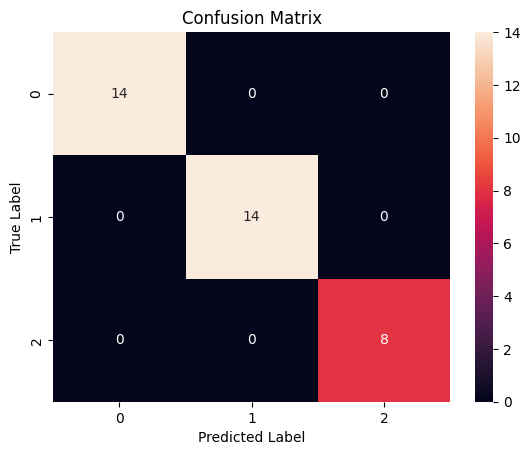

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # To see the output, run the code.

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # ... other hyperparameters
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)

Best Model: RandomForestClassifier(random_state=42)
Best Score: 0.9785714285714286


Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

Confusion Matrix:
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


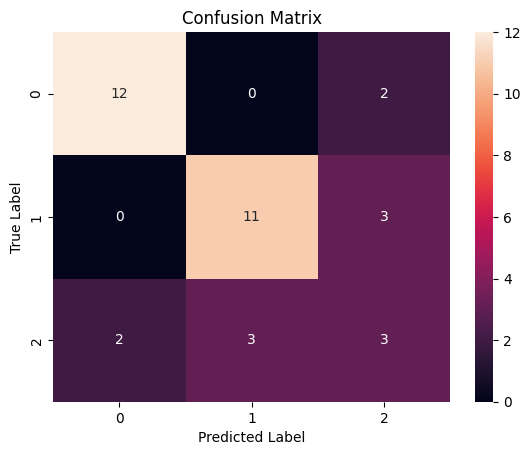

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # To see the output, run the code.

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

In [ ]:
from sklearn.model_selection import cross_val_score

# Try different values of k
k_values = list(range(1, 31))  # Try k from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the k with the highest cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k:", optimal_k)

# Create a new KNN classifier with the optimal k
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

Optimal k: 17


KNeighborsClassifier(n_neighbors=17)

Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36

Confusion Matrix:
[[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]


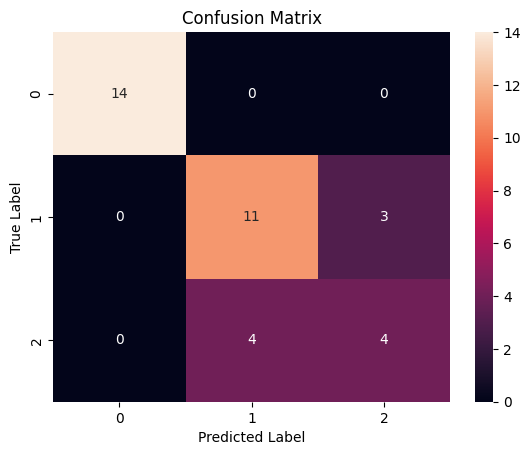

Best Model: SVC(C=0.1, gamma=0.001, kernel='linear', random_state=42)
Best Score: 0.9576354679802955


In [ ]:
from sklearn.svm import SVC
# Create an SVC object
svc_classifier = SVC(kernel='rbf', random_state=42)  # You can adjust kernel and other hyperparameters

# Fit the model to the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # To see the output, run the code.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Create GridSearchCV object
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

In [ ]:
import pandas as pd

# Ensure all lists in 'results' have the same length
max_len = max(len(v) for v in results.values())
for k in results:
    if len(results[k]) < max_len:
        results[k].extend([None] * (max_len - len(results[k])))  # Pad with None

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision   Recall  F1-Score
0  Logistic Regression  0.972222   0.977778  0.97619   0.97616
1        Decision Tree  0.972222   0.977778  0.97619   0.97616
2        Random Forest  0.972222   0.977778  0.97619   0.97616
3                  KNN  0.972222   0.977778  0.97619   0.97616
4                  SVC       NaN        NaN      NaN       NaN
